### Part A ImprovedGreedy

# 1. 

### Problem Formulation

1. **$ S $ - State Space:**
    - The state space includes the positions of all robots, charging stations, packages, and destinations, the battery level of each robot, and the credit of each robot.
    - $ S = \{ \text{robot\_positions}, \text{charge\_stations}, \text{packages}, \text{destinations}, \text{battery\_levels}, \text{credits}, \text{turn} \} $

2. **$ A $ - Action Space:**
    - The action space includes all possible movements for a robot, picking up and dropping off packages, and charging.
    - $ A = \{ \text{move\_north}, \text{move\_south}, \text{move\_east}, \text{move\_west}, \text{pick\_up}, \text{drop\_off}, \text{charge} \} $

3. **$ F $ - Transition Function:**
    - The transition function defines how the state changes after performing an action.
    - $ F(s, a) $ returns the new state $ s' $ after performing action $ a $ in state $ s $.

4. **$ C $ - Cost Function:**
    - The cost function defines the cost associated with performing an action.
    - Each movement costs 1 unit of energy.
    - $ C(s, a) = 1 $ for movement, $ C(s, a) = 0 $ for picking up and dropping off, and charging requires converting credit units to charge.

5. **$ S_0 $ - Initial State:**
    - The initial state defines the starting positions of all robots, charging stations, packages, and destinations.
    - $ S_0 = \{ \text{initial\_robot\_positions}, \text{initial\_charge\_stations}, \text{initial\_packages}, \text{initial\_destinations}, \text{initial\_battery\_levels}, \text{initial\_credits}, \text{initial\_turn} \} $

6. **$ R $ - Reward Function:**
    - The reward function defines the reward a robot receives after performing an action.
    - A robot receives 2 times the Manhattan distance between the original package location and its destination.
    - $ R(s, a) $ returns the reward based on the action performed.


## 2.

**Heuristic Calculation:**

Given the above components, the heuristic value $ h(s) $ for state $ s $ is defined as:
$
h(s) = \left( \frac{N \times w_{\text{goto\_dest}} \times ((\text{robot.credit} + 1) \times 3)}{d_r + 1} \right)
$
Where:
- **$N$** is the board size, reflecting the scale of distances on the board.
- **$w_{\text{goto\_dest}}$** is a weight indicating the importance of moving towards the destination or nearest package.
- **$d_r$** is the dynamic distance variable reflecting the nearest critical objective (delivery destination, nearest package, or charging station).
- **The expression $(\text{robot.credit} + 1) \times 3$** escalates the influence of the robot's credit on its performance evaluation, enhancing the heuristic as the robot performs tasks successfully.

**Operational Example:**

This heuristic function allows the robot to weigh its options dynamically between continuing a delivery, picking up a new package, or recharging. The balance ensures optimal performance by not just blindly following the nearest task but also considering the state of its resources, namely battery and credits, to make strategic decisions that enhance operational efficiency and task completion in the simulated environment.

1. **$ S $ - State Space:**
    - The state space includes the positions of all robots, charging stations, packages, and destinations, the battery level of each robot, and the credit of each robot.
    - $ S = \{ \text{robot\_positions}, \text{charge\_stations}, \text{packages}, \text{destinations}, \text{battery\_levels}, \text{credits}, \text{turn} \} $
    - For example: $ S = \{ (x_1, y_1), (x_2, y_2), \ldots \} $ for the positions of robots, charging stations, packages, and destinations.

2. **$ A $ - Action Space:**
    - The action space includes all possible movements for a robot, picking up and dropping off packages, and charging.
    - $ A = \{ \text{move\_north}, \text{move\_south}, \text{move\_east}, \text{move\_west}, \text{pick\_up}, \text{drop\_off}, \text{charge} \} $

3. **$ F $ - Transition Function:**
    - The transition function defines how the state changes after performing an action.
    - $ F(s, a) $ returns the new state $ s' $ after performing action $ a $ in state $ s $.

4. **$ C $ - Cost Function:**
    - The cost function defines the cost associated with performing an action.
    - For example, each movement costs 1 unit of energy.
    - $ C(s, a) = 1 $ for movement, $ C(s, a) = 0 $ for picking up and dropping off, and charging requires converting credit units to charge.

5. **$ S_0 $ - Initial State:**
    - The initial state defines the starting positions of all robots, charging stations, packages, and destinations.
    - $ S_0 = \{ \text{initial\_robot\_positions}, \text{initial\_charge\_stations}, \text{initial\_packages}, \text{initial\_destinations}, \text{initial\_battery\_levels}, \text{initial\_credits}, \text{initial\_turn} \} $

6. **$ R $ - Reward Function:**
    - The reward function defines the reward a robot receives after performing an action.
    - For example, a robot receives 2 times the Manhattan distance between the original package location and its destination.
    - $ R(s, a) $ returns the reward based on the action performed.

     



### 3. Implementation smart heuristic

In [12]:
# run h_smart_test.py 
bashCommand = "python3 h_smart_test.py"
import subprocess
process = subprocess.Popen(bashCommand.split(), stdout=subprocess.PIPE)
output, error = process.communicate()
print(output)

b'pygame 2.6.0 (SDL 2.28.4, Python 3.10.13)\nHello from the pygame community. https://www.pygame.org/contribute.html\nHeuristic value for robot 0: 40.0\nHeuristic value for robot 1: 144.0\n'


.
----------------------------------------------------------------------
Ran 1 test in 0.000s

OK


## Part B  -  R-B Minimax

### 1.
### Advantages and Disadvantages of Using 
### Easy-to-Compute Heuristics  vs  Hard-to-Compute Heuristics

#### Advantages of Easy-to-Compute Heuristics:

When we are using Easy-to-Compute Heuristics, we can get the following advantages:
 - **Speed**: Easy-to-compute heuristics offer significant speed advantages, allowing the algorithm to evaluate many states quickly within a limited time( collect more solutions to take the best from). This rapid computation is particularly valuable in time-constrained or depth-limited scenarios, enabling fast evaluations and quick responses.

 - **Simplicity**: The simplicity of these heuristics makes them easier to understand and implement, reducing the likelihood of errors and facilitating maintenance and future improvements. They can be easily integrated into iterative search processes, making them suitable for real-time updates and adjustments.

#### Advantages of Hard-to-Compute Heuristics:
- **Accuracy**: Hard-to-compute heuristics are more likely to provide higher accuracy and more detailed evaluations. They tend to be more precise, which enhances the algorithm's ability to make accurate predictions about optimal moves.

- **Informativeness**: By incorporating more data and advanced methods, these heuristics capture important nuances and provide better overall state assessments. This level of informativeness improves the quality of decision-making, potentially leading to better performance in complex scenarios.

- **Modifiability**: Hard-to-compute heuristics can refer to heuristics that are contained more hyperparameters for each factor which can be adjusted to improve the performance of the algorithm.


### 2.

### Example to Demonstrate Minimax Limitations:

In this warehouse game, two robots compete to collect and deliver packages to designated destinations. The goal is to accumulate the highest score by delivering packages, with each delivery earning points based on the Manhattan distance between the package's origin and destination. Each move costs battery power, and robots need to recharge periodically.

Consider the following game state:

- **Robot 0**: Positioned at (0, 0), with 20 battery units and 0 credits.
- **Robot 1**: Positioned at (4, 4), with 10 battery units and 5 credits.
- **Packages**: 
  - Package 1 at (1, 1), destination (3, 3).
  - Package 2 at (2, 2), destination (4, 4).

Let's assume the evaluation function for Minimax focuses on maximizing the score and maintaining a sufficient battery level, but does not prioritize the number of steps to win.

#### Minimax Evaluation Example

1. **Option A (Robot 0)**: 
   - Move to (1, 1) to pick up Package 1.
   - Move to (3, 3) to deliver Package 1.
   - Total steps: 5 (2 steps to pick up, 3 steps to deliver).
   - Score: 4 (Manhattan distance 2 * 2).

2. **Option B (Robot 0)**:
   - Move to (2, 2) to pick up Package 2.
   - Move to (4, 4) to deliver Package 2.
   - Total steps: 6 (2 steps to pick up, 4 steps to deliver).
   - Score: 8 (Manhattan distance 4 * 2).
   
#### Minimax Choice

Minimax might evaluate the scores as follows:
- **Option A**: Score 4, fewer steps.
- **Option B**: Score 8, more steps.

Since Minimax aims to maximize the score, it will choose **Option B** for Robot 0, even though it takes more steps to achieve the higher score.

Given the two options:
- **Option A**: 5 steps, score 4.
- **Option B**: 6 steps, score 8.

Minimax will evaluate the scores and select the action leading to the higher score, **Option B**, even though it takes more steps to complete. This clearly demonstrates that Minimax prioritizes the optimal value (higher score) over the shortest path to victory (fewest steps).


### 3.

Handling Time Limitation Instead of Depth Limitation

When the limited resource is runtime rather than search depth, the algorithms are must be able to stop and return with the best result found within the time limit, can be managed using **Incremental Search** techniques, where performance improves with more available time.

#### How to Handle Time Limitation?

1. **Iterative Deepening Search:**
We can reffer it with finding result first.
   - The algorithm performs a search to a limited depth, then increases the depth and repeats the search.
   - If time runs out, it returns the best result found so far.
   - This ensures optimal use of the allotted time without exceeding the limit.
   Algorithms like **Iterative Deepening A* (IDA*)**, **Iterative Deepening Depth-First Search (IDDFS)**, and **Iterative Deepening Minimax**  use this approach.

2. **Continuous Time Monitoring:**
   - The algorithm continuously checks the remaining time during the search.
   - If time is insufficient for the current depth, it stops and returns the best result so far.
 Algorithms like **Real-Time A* (RTA*)** and **Real-Time Minimax** use this approach.



In general this algorithms are called **Incremental Algorithms** or **Progressive Computation Algorithms**.

In the course we learnd about **Iterative Deepening Search** which is a good example of handling time limitation instead of depth limitation.

Example Learned in the Course: is **Anytime**

### 4. Implementing Time Limitation in Minimax:
Tests with  python main.py minimax random -t 1 -s 1234 -c 200 --console_print --screen_print



In [5]:

# python main.py minimax random -t 1 -s 1234 -c 200 --console_print --screen_print
import subprocess
def test_minimax_random():
    #run 2 , 4, 8, 16, 32, 64 sec
    for i in range(1, 7):
        bashCommand = "python main.py minimax random -t " + str(2**i) + " -s 1234 -c 200 --console_print --screen_print"
        process = subprocess.Popen(bashCommand.split(), stdout=subprocess.PIPE)
        output, error = process.communicate()
        if error:
            print("error")
        print(output)
        print("done")


test_minimax_random()



b'pygame 2.6.0 (SDL 2.28.4, Python 3.8.19)\nHello from the pygame community. https://www.pygame.org/contribute.html\ninitial board:\n[R1][P0][  ][C1][C0]\n[D1][  ][  ][  ][  ]\n[  ][P1][  ][  ][  ]\n[R0][  ][  ][  ][  ]\n[  ][  ][  ][D0][  ]\nrobots:  [position:(0, 3) battery: 20 credit: 0 package: [None], position:(0, 0) battery: 20 credit: 0 package: [None]]\npackages on street:  [position:(1, 0) destination: (3, 4), position:(1, 2) destination: (0, 1), position:(0, 3) destination: (3, 3), position:(2, 3) destination: (0, 1)]\n(1, 0) (3, 4) True\n(1, 2) (0, 1) True\n(0, 3) (3, 3) False\n(2, 3) (0, 1) False\ncharge stations:  [position:(4, 0), position:(3, 0)]\nrobot 0 chose move north\n[R1][P0][  ][C1][C0]\n[D1][  ][  ][  ][  ]\n[R0][P1][  ][  ][  ]\n[  ][  ][  ][  ][  ]\n[  ][  ][  ][D0][  ]\nrobots:  [position:(0, 2) battery: 19 credit: 0 package: [None], position:(0, 0) battery: 20 credit: 0 package: [None]]\npackages on street:  [position:(1, 0) destination: (3, 4), position:(1, 

KeyboardInterrupt: 

## 5. 
### Explanation and Definition:

In a multi-agent environment, we modify the Minimax algorithm to consider multiple players and their interactions.
We introduce weights to balance the influence of each agent's utility. Here’s how the pseudocode would be
modified for three different scenarios with specific weights \(\lambda\) and \(\theta\).


- λ :
    Definition: The weight assigned to the utility of the current agent making the decision, 
    reflecting the importance of the agent's own utility in the combined calculation.

 - θ:
    The weight assigned to the utility of other agents, balancing their influence in the combined utility calculation.

### Pseudocode for Weighted Minimax with Specific Cases:

#### a. Each Agent Wants to Win:

In this case, each agent aims to maximize their own utility.

**Pseudocode:**

```pseudo
function Minimax(State, Agent, Turn, λ=1, θ=0):
    if G(State) then return Utility(State, Agent, λ, θ)
    
    Children ← Succ(State)
    if Turn = Agent then:
        CurMax ← −∞
        for c in Children:
            v ← Minimax(c, Agent, (Turn + 1) % K, λ, θ)
            CurMax ← Max(v, CurMax)
        return CurMax
    else:
        CurMin ← ∞
        for c in Children:
            v ← Minimax(c, Agent, (Turn + 1) % K, λ, θ)
            CurMin ← Min(v, CurMin)
        return CurMin

function Utility(State, Agent, λ, θ):
    agent_utility = U(State, Agent)
    others_utility = 0
    combined_utility = λ * agent_utility + θ * others_utility
    return combined_utility
```

**Explanation:**
- **λ=1, θ=0:** The agent aims to maximize only its own utility.

#### b. Each Agent Wants to Minimize Your Utility:

In this case, each agent (except the target agent) aims to minimize the target agent's utility.

**Pseudocode:**

```pseudo
function Minimax(State, Agent, Turn, λ=1, θ=-1):
    if G(State) then return Utility(State, Agent, λ, θ)
    
    Children ← Succ(State)
    if Turn = Agent then:
        CurMax ← −∞
        for c in Children:
            v ← Minimax(c, Agent, (Turn + 1) % K, λ, θ)
            CurMax ← Max(v, CurMax)
        return CurMax
    else:
        CurMin ← ∞
        for c in Children:
            v ← Minimax(c, Agent, (Turn + 1) % K, λ, θ)
            CurMin ← Min(v, CurMin)
        return CurMin

function Utility(State, Agent, λ, θ):
    agent_utility = U(State, Agent)
    others_utility = 0
    for other_agent in OtherAgents(Agent):
        others_utility += U(State, other_agent)
    combined_utility = λ * agent_utility + θ * others_utility
    return combined_utility
```

**Explanation:**
- **λ=1, θ=-1:** The other agents aim to minimize the target agent's utility.

#### c. Each Agent Wants the Next Agent to Receive Maximum Utility:

In this case, each agent aims to maximize the utility of the next agent in the sequence.

**Pseudocode:**

```pseudo
function Minimax(State, Agent, Turn, λ=0, θ=1):
    if G(State) then return Utility(State, Agent, Turn, λ, θ)
    
    Children ← Succ(State)
    if Turn = Agent then:
        CurMax ← −∞
        for c in Children:
            v ← Minimax(c, Agent, (Turn + 1) % K, λ, θ)
            CurMax ← Max(v, CurMax)
        return CurMax
    else:
        CurMin ← ∞
        for c in Children:
            v ← Minimax(c, Agent, (Turn + 1) % K, λ, θ)
            CurMin ← Min(v, CurMin)
        return CurMin

function Utility(State, Agent, Turn, λ, θ):
    next_agent = (Turn + 1) % K
    agent_utility = U(State, Agent)
    next_agent_utility = U(State, next_agent)
    combined_utility = λ * agent_utility + θ * next_agent_utility
    return combined_utility
```

**Explanation:**
- **λ=0, θ=1:** Each agent aims to maximize the utility of the next agent in the sequence.

### Summary of Changes:

1. **a. Each Agent Wants to Win:**
   - Use \(\lambda=1\) and \(\theta=0\) to focus solely on the agent's utility.

2. **b. Each Agent Wants to Minimize Your Utility:**
   - Use \(\lambda=1\) and \(\theta=-1\) to focus on minimizing the specific agent's utility by considering the negative impact of other agents.

3. **c. Each Agent Wants the Next Agent to Receive Maximum Utility:**
   - Use \(\lambda=0\) and \(\theta=1\) to maximize the next agent’s utility in the sequence.

These adjustments ensure that the Minimax algorithm accounts for different strategies and objectives of multiple agents in the game, providing appropriate utility calculations based on the scenario.

## Part F

### 1. print IMG_46446EEB18F4-1.jpeg




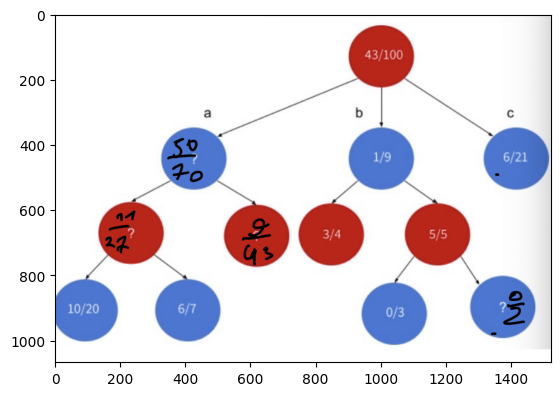

In [2]:
# print the IMG_46446EEB18F4-1.jpeg
!pip install matplotlib

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('IMG_EE9EBCAC7E63-1.jpeg')
imgplot = plt.imshow(img)
plt.show()

Expleantion:

 - a:
 the parent have 43 tree success and 1000 simulation so in this level we have 100 - 43 = 57 tree success, in the other to ngihtbors 21 +9=30  tries and  1+7 success so in the last one we have 100-30 = 70 tries and 57 -

### Open question:
### 1. 

Monte Carlo simulation addresses the problem of predicting the outcomes of uncertain events. It deals with this issue by using random sampling to model and estimate the probability of various possible outcomes, especially in complex systems where traditional methods are impractical.

### 2.
The algorithm receives $K$, the number of sampled states from $S_{\text{complete}} $, as a parameter. Here are the considerations for choosing the value of $K$ :
**Considerations for Choosing $K$:**
1. **Computational Resources**: More samples require more computational time and memory. Choosing a value that is too large can lead to excessive use of resources.
2. **Model Accuracy**: Too few samples may not provide an accurate representation of the true distribution of states. This can result in poor model performance.

**Impact of Choosing$K$ Too Small or Too Large:**
- **Too Small**: If $K$ is too small, the results may be inaccurate because the sample won't adequately represent the true distribution of states. This leads to a model that does not accurately predict outcomes.
- **Too Large**: If $K$ is too large, it will result in high computational costs. This means the algorithm will take more time and use more memory than necessary, leading to inefficiency without significant improvement in model accuracy.

Finding the right balance is crucial to ensure the model is both efficient and accurate.

For exmaple, from my last work in quantum algorithms when i was running a simulation for algorithm that called Grover's algorithm, choosing an appropriate $K$ is essential. If too few samples are used, the simulation might not capture the correct behavior of the algorithm, leading to inaccurate results. If too many samples are used, the simulation becomes computationally expensive without significant gains in accuracy. Therefore, balancing $K$ is crucial for efficient and accurate simulations.

### 3.
Dana argues that for a large $K $ equal to $|S_{\text{complete}}|$, the Monte Carlo algorithm can be modeled using probabilistic nodes and the Expectimax algorithm. 

- **Monte Carlo with Large $ K $:** Samples all possible states uniformly, producing an accurate estimate of expected values by averaging the results.

- **Expectimax:** Computes the expected value by taking all states and their probabilities into account, resulting in a weighted average.

**Modeling with Expectimax:**

1. **Probabilistic Nodes:**
   - In the Expectimax framework, probabilistic nodes represent the uncertainties in the game caused by partial information.
   - Each probabilistic node corresponds to a possible game state and the probability of that state occurring.

2. **Decision Nodes:**
   - Decision nodes capture the choices available to the player at each game state.
   - Each decision node branches into all possible actions the player can take.

3. **Building the Expectimax Tree:**
   - Construct an Expectimax tree where each decision node splits into branches for all possible actions.
   - Each action leads to a probabilistic node that further branches into all resultant states with their respective probabilities.

**Explaining the Equivalence:**

- **Monte Carlo Simulation:**
  - This algorithm estimates the expected value of actions by randomly sampling possible states and averaging the outcomes.
  - For a large $K $ equal to $|S_{\text{complete}}|$, Monte Carlo effectively samples the entire state space uniformly.

- **Expectimax Algorithm:**
  - Expectimax calculates the expected value of actions by considering all possible states and their probabilities, yielding a weighted average of the outcomes.

**Why They Are Equivalent:**

When 4 K $ is large enough to cover all possible states $(|S_{\text{complete}}|)$, Monte Carlo’s sampling includes every possible state, mimicking a comprehensive sweep through the state space. This uniform sampling ensures that the average outcome from Monte Carlo is equivalent to the weighted average calculated by Expectimax, as both methods account for the same set of possible states and their probabilities.

Because both methods ultimately consider the same states and probabilities when $ K $ is sufficiently large, the expected values they compute are identical. Thus, modeling the Monte Carlo simulation using probabilistic nodes in an Expectimax tree achieves the same results, rendering the two approaches functionally equivalent.

### 4.
### Anytime Version of the Monte Carlo Algorithm

An Anytime version of the Monte Carlo algorithm allows for the algorithm to be stopped at any point, 
 providing a valid solution that improves in quality as more computation time is given.

**Pseudocode:**

```pseudo
function AnytimeMonteCarlo(S_complete, initial_K, increment, max_time):
    // Step 1: Initialization
    best_estimate = 0
    total_samples = 0
    start_time = current_time
    
    // Step 2: Initial sampling
    samples = sampleStates(S_complete, initial_K)
    total_samples += initial_K
    best_estimate = computeEstimate(samples)
    
    while (current_time - start_time) < max_time:
        // Step 3: Sample more states
        new_samples = sampleStates(S_complete, increment)
        total_samples += increment
        
        // Step 4: Compute new estimate with additional samples
        new_estimate = computeEstimate(new_samples)
        
        // Step 5: Update the best estimate
        best_estimate = updateEstimate(best_estimate, new_estimate, total_samples)
    
    return best_estimate

sampleStates(S_complete, K):
    // Randomly sample K states from S_complete
    sampled_states = []
    for i from 1 to K:
        state = randomSample(S_complete)
        sampled_states.append(state)
    return sampled_states

computeEstimate(samples):
    // Compute the expected value based on the samples
    total_value = 0
    for sample in samples:
        total_value += evaluate(sample)
    return total_value / len(samples)

updateEstimate(current_best, new_estimate, total_samples):
    // Update the best estimate using a weighted average
    return ((current_best * (total_samples - len(new_samples))) + (new_estimate * len(new_samples))) / total_samples
```


1. **Initialization:** The algorithm starts with a small number of samples (\(initial_K\)) and performs an initial sampling of states from \( S_{\text{complete}} \).

2. **Iterative Process:** The algorithm continues to sample additional states in increments and refines the estimate with each iteration.

3. **Interruptibility:** The algorithm can be stopped at any point, providing the best estimate computed up to that moment.

**Alignment with Anytime Algorithm Principles:**

1. **Interruptibility:** The algorithm can be interrupted at any time and will return the best estimate computed up to that point, making it useful in situations where computation time is limited or uncertain.

2. **Progressive Improvement:** The algorithm improves its estimate as it runs longer by continuously sampling more states and refining the expected value. This ensures that the longer it runs, the better the quality of the solution.
